In [1]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

170498071/170498071 [==============================] - 6s 0us/step
(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [2]:
import tensorflow as tf

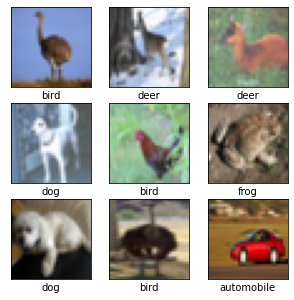

In [3]:
import matplotlib.pyplot as plt
import numpy as np
# np.random.seed(12345)
tf.random.set_seed(12345)
class_names = ['airplane', 'automobile', 'bird', 'cat',
              'deer', 'dog', 'frog', 'horse',
              'ship', 'truck']

sample_size = 9
random_idx = np.random.randint(50000, size=sample_size) 

plt.figure(figsize = (5, 5))
for i, idx in enumerate(random_idx):
    plt.subplot(3, 3, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[idx], cmap = 'gray')
    plt.xlabel(class_names[int(y_train[idx])])
plt.show()

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam

model = tf.keras.models.Sequential()
#‘same’ : 출력 이미지 사이즈가 입력 이미지 사이즈와 동일
model.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu', input_shape = (32, 32, 3)))
model.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))
model.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))
model.add(tf.keras.layers.Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(tf.keras.layers.Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation = 'relu'))
model.add(tf.keras.layers.Dense(10, activation = 'softmax'))


model.compile(optimizer="Adam", loss = 'sparse_categorical_crossentropy', metrics = ['acc'])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                    

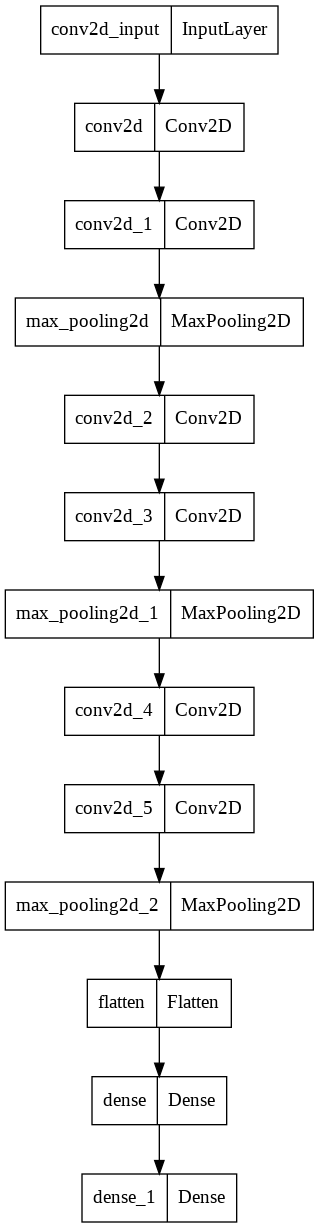

In [7]:
import keras
keras.utils.plot_model(model)

In [6]:
# model.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu', input_shape = (32, 32, 3)))
# model.add(tf.keras.layers.MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))
# model.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
# model.add(tf.keras.layers.MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))
# model.add(tf.keras.layers.Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
# model.add(tf.keras.layers.MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))
# model.add(tf.keras.layers.Flatten())
# model.add(tf.keras.layers.Dense(256, activation = 'relu'))
# model.add(tf.keras.layers.Dense(10, activation = 'softmax'))


In [7]:
import time
start_time = time.time()
history = model.fit(x_train, y_train, epochs = 10, validation_split=0.2, batch_size = 2**5)
end_time = time.time()
print("WorkingTime: {} sec".format(end_time-start_time))

Epoch 1/10
1250/1250 [==============================] - 7s 5ms/step - loss: 0.6245 - acc: 0.7830 - val_loss: 0.8696 - val_acc: 0.7254
Epoch 2/10
1250/1250 [==============================] - 7s 6ms/step - loss: 0.5714 - acc: 0.8002 - val_loss: 0.8224 - val_acc: 0.7378
Epoch 3/10
1250/1250 [==============================] - 7s 6ms/step - loss: 0.5124 - acc: 0.8218 - val_loss: 0.9237 - val_acc: 0.7082
Epoch 4/10
1250/1250 [==============================] - 7s 5ms/step - loss: 0.4843 - acc: 0.8338 - val_loss: 0.9504 - val_acc: 0.7175
Epoch 5/10
1250/1250 [==============================] - 7s 6ms/step - loss: 0.4430 - acc: 0.8480 - val_loss: 0.9150 - val_acc: 0.7327
Epoch 6/10
1250/1250 [==============================] - 7s 5ms/step - loss: 0.4234 - acc: 0.8539 - val_loss: 0.9898 - val_acc: 0.7301
Epoch 7/10
1250/1250 [==============================] - 7s 6ms/step - loss: 0.4019 - acc: 0.8635 - val_loss: 0.9757 - val_acc: 0.7336
Epoch 8/10
1250/1250 [==============================] - 7s 5ms

In [8]:
!nvidia-smi

Thu Jan  5 01:44:44 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   69C    P0    30W /  70W |   1410MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

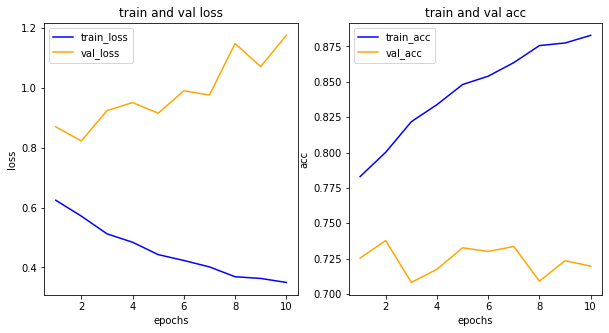

In [9]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] 

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()

# Dropout 을 이용한 성능개선

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam

model_drop = tf.keras.models.Sequential()
model_drop.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu', input_shape = (32, 32, 3)))

model_drop.add(tf.keras.layers.Dropout(0.15)) 
model_drop.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu'))
model_drop.add(tf.keras.layers.MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))
model_drop.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))

model_drop.add(tf.keras.layers.Dropout(0.15))
model_drop.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model_drop.add(tf.keras.layers.MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))
model_drop.add(tf.keras.layers.Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))

model_drop.add(tf.keras.layers.Dropout(0.15))
model_drop.add(tf.keras.layers.Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model_drop.add(tf.keras.layers.MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))
model_drop.add(tf.keras.layers.Flatten())

model_drop.add(tf.keras.layers.Dropout(0.3))
model_drop.add(tf.keras.layers.Dense(256, activation = 'relu'))
model_drop.add(tf.keras.layers.Dense(10, activation = 'softmax'))

model_drop.compile(optimizer = Adam(1e-4),
             loss = 'sparse_categorical_crossentropy',
             metrics = ['acc'])

In [18]:
model_drop.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_41 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_42 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 64)        0         
                                                      

In [11]:
history_drop = model_drop.fit(x_train, y_train,
                    epochs = 10,
                    batch_size = 32,
                    validation_split=0.2)

Epoch 1/10
1250/1250 [==============================] - 8s 6ms/step - loss: 2.0725 - acc: 0.2845 - val_loss: 1.7443 - val_acc: 0.3754
Epoch 2/10
1250/1250 [==============================] - 7s 6ms/step - loss: 1.5661 - acc: 0.4283 - val_loss: 1.5278 - val_acc: 0.4607
Epoch 3/10
1250/1250 [==============================] - 8s 6ms/step - loss: 1.3960 - acc: 0.4972 - val_loss: 1.3288 - val_acc: 0.5312
Epoch 4/10
1250/1250 [==============================] - 7s 6ms/step - loss: 1.2616 - acc: 0.5496 - val_loss: 1.1760 - val_acc: 0.6026
Epoch 5/10
1250/1250 [==============================] - 7s 6ms/step - loss: 1.1382 - acc: 0.5951 - val_loss: 1.0632 - val_acc: 0.6434
Epoch 6/10
1250/1250 [==============================] - 7s 6ms/step - loss: 1.0314 - acc: 0.6326 - val_loss: 0.9875 - val_acc: 0.6622
Epoch 7/10
1250/1250 [==============================] - 7s 6ms/step - loss: 0.9548 - acc: 0.6641 - val_loss: 0.9199 - val_acc: 0.6864
Epoch 8/10
1250/1250 [==============================] - 8s 6ms

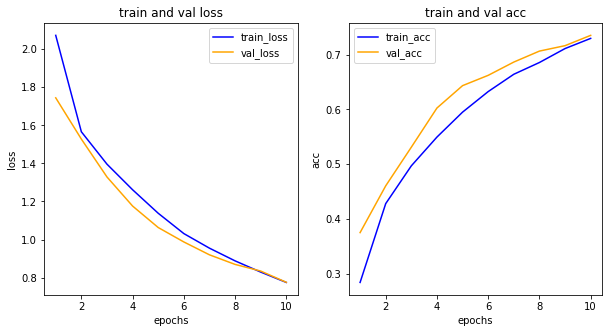

In [13]:
import matplotlib.pyplot as plt

his_dict = history_drop.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] 

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()

# Batch Normalization

In [19]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam

model_bn = tf.keras.models.Sequential()
model_bn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu', input_shape = (32, 32, 3)))
model_bn.add(tf.keras.layers.BatchNormalization())

model_bn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu'))
model_bn.add(tf.keras.layers.MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))
model_bn.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model_bn.add(tf.keras.layers.BatchNormalization())

model_bn.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model_bn.add(tf.keras.layers.MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))
model_bn.add(tf.keras.layers.Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model_bn.add(tf.keras.layers.BatchNormalization())

model_bn.add(tf.keras.layers.Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model_bn.add(tf.keras.layers.MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))
model_bn.add(tf.keras.layers.Flatten())
model_bn.add(tf.keras.layers.BatchNormalization())

model_bn.add(tf.keras.layers.Dense(256, activation = 'relu'))
model_bn.add(tf.keras.layers.BatchNormalization())

model_bn.add(tf.keras.layers.Dense(10, activation = 'softmax'))

model_bn.compile(optimizer = Adam(1e-4),
             loss = 'sparse_categorical_crossentropy',
             metrics = ['acc'])

In [20]:
model_bn.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_46 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_47 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_48 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 16, 16, 64)      

In [ ]:
history_bn = model_bn.fit(x_train, y_train,
                    epochs = 10,
                    batch_size = 32,
                    validation_split=0.2)

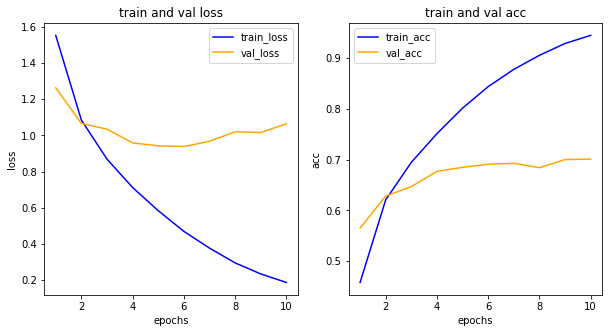

In [16]:
import matplotlib.pyplot as plt

his_dict = history_bn.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] 

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()